# The series class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.linear_model import LinearRegression
from pandas.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_acf

plt.style.use("ggplot")

## Pandas Series class
Pandas Series is a **one-dimensional** labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called **index**. Pandas Series is nothing but a column

In [2]:
# Simple array
data = [1, 2, 3, 4]

series = pd.Series(data)
print(series)

0    1
1    2
2    3
3    4
dtype: int64


## Index of a pandas series
How do you indeces a series?

In [3]:
# Create simple array
data = np.array(list("hello, how are you?"))
series = pd.Series(data, index=range(1, len(data) + 1))
print(series)

1     h
2     e
3     l
4     l
5     o
6     ,
7      
8     h
9     o
10    w
11     
12    a
13    r
14    e
15     
16    y
17    o
18    u
19    ?
dtype: object


In [4]:
# Access element
print(series[16])

y


## daily-total-female-births.csv
Load *daily-total-female-births.csv'* dataset using read_csv()

In [5]:
ts = pd.read_csv("datasets/daily-total-female-births.csv",
                 index_col=0, parse_dates=True, header=0)
ts = ts.squeeze("columns")
print(ts)

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, Length: 365, dtype: int64


In [6]:
# Querying by time
print(ts.loc["1959-01"])

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Births, dtype: int64


In [7]:
# Statistics
print(ts.describe())

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64


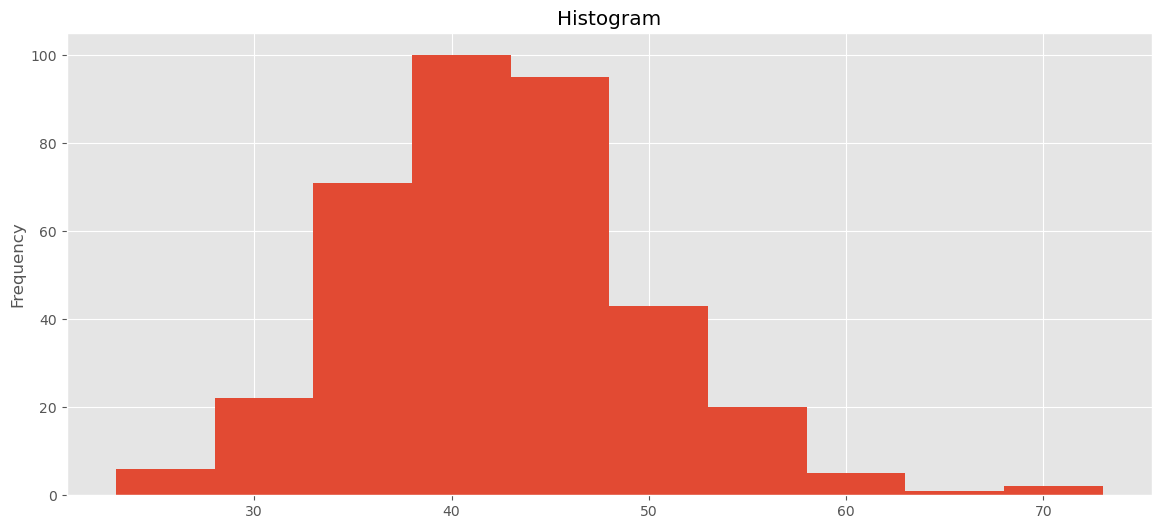

In [8]:
# Histogram
ts.plot(kind="hist", title="Histogram", figsize=(14, 6));

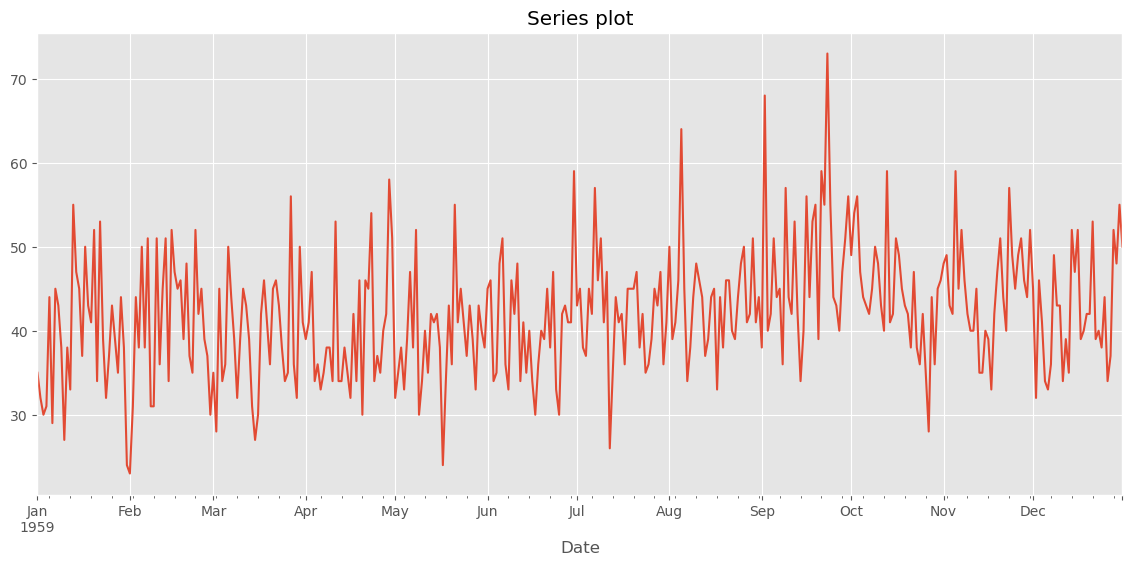

In [9]:
# Series plot
ts.plot(title="Series plot", figsize=(14, 6));

# Detrending a time series

## Detrend by differencing

In [10]:
series = pd.read_csv("datasets/shampoo.csv",
                     header=0, index_col=0).squeeze("columns")
print(series)

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
1-06    168.5
1-07    231.8
1-08    224.5
1-09    192.8
1-10    122.9
1-11    336.5
1-12    185.9
2-01    194.3
2-02    149.5
2-03    210.1
2-04    273.3
2-05    191.4
2-06    287.0
2-07    226.0
2-08    303.6
2-09    289.9
2-10    421.6
2-11    264.5
2-12    342.3
3-01    339.7
3-02    440.4
3-03    315.9
3-04    439.3
3-05    401.3
3-06    437.4
3-07    575.5
3-08    407.6
3-09    682.0
3-10    475.3
3-11    581.3
3-12    646.9
Name: Sales, dtype: float64


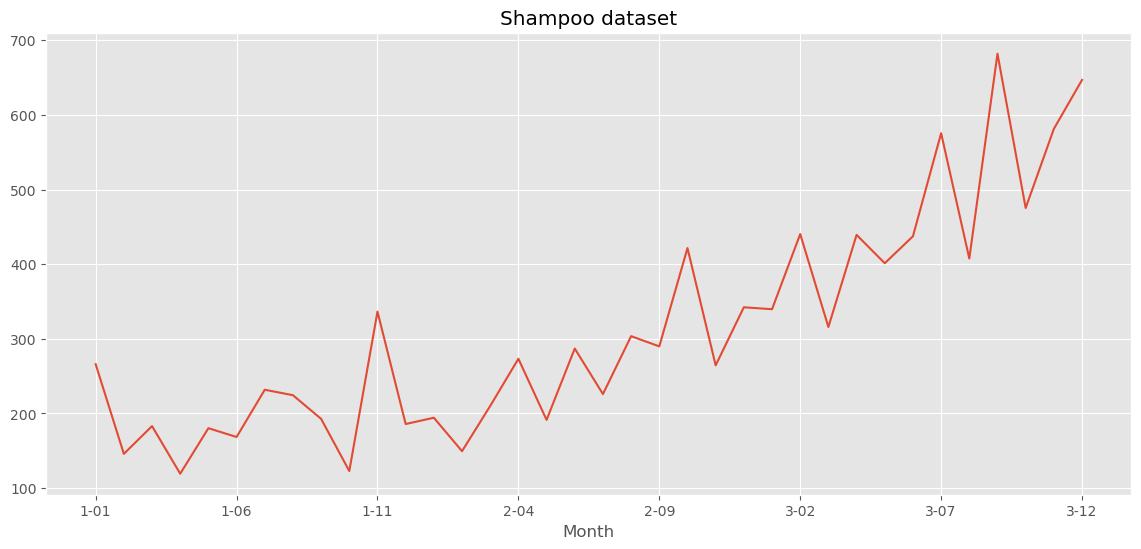

In [11]:
series.plot(title="Shampoo dataset", figsize=(14, 6));

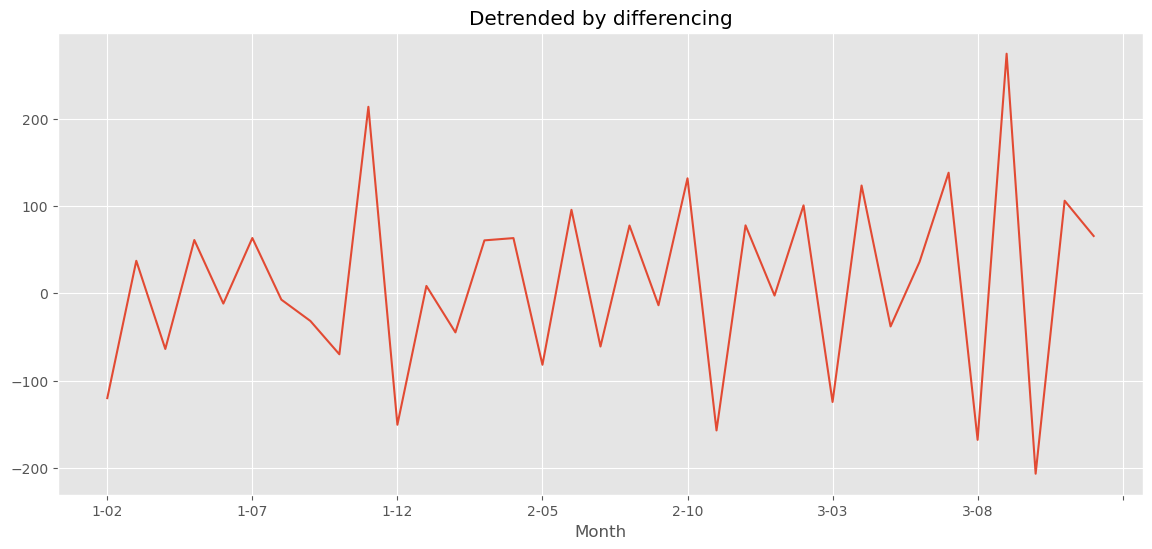

In [12]:
# Differencing
x = series.values

diff = list()

for i in range(1, len(x)):
    value = x[i] - x[i - 1]
    diff.append(value)
    
diff = pd.Series(diff, index=series.index[1:])
diff.plot(figsize=(14, 6), title="Detrended by differencing");

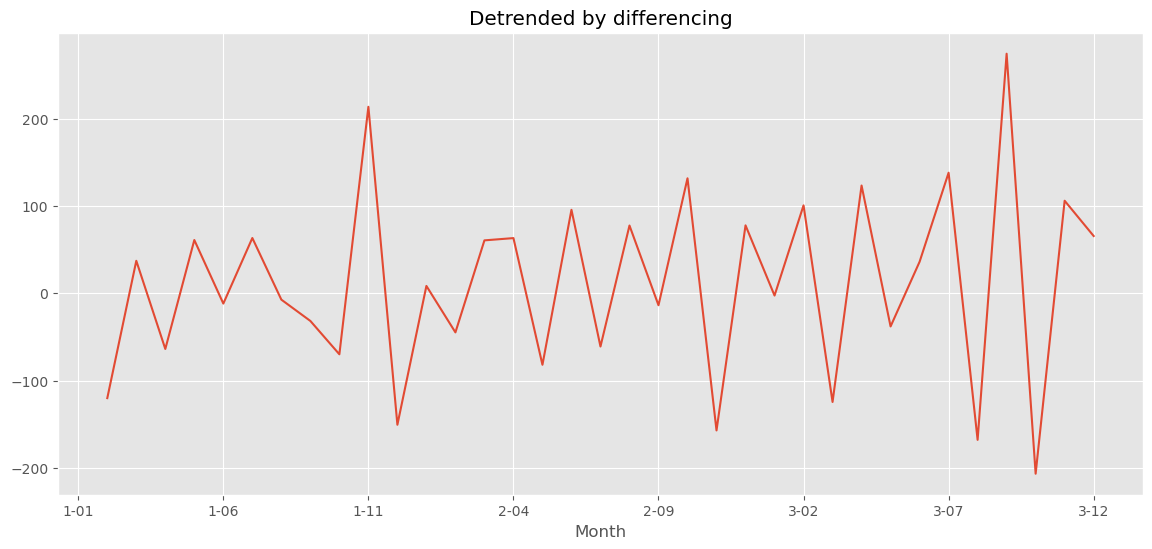

In [13]:
# Is possible also to do the following:
diff = (series - series.shift(1))
diff.plot(figsize=(14, 6), title="Detrended by differencing");

## Detrend by model fitting

In [14]:
x = np.arange(0, len(series))
x = x.reshape(len(x), 1)
y = series.values

In [15]:
model = LinearRegression()
model.fit(x, y)

intercept = model.intercept_
slope = model.coef_[0]
print(f"{intercept = }")
print(f"{slope = }")

intercept = 101.2162162162162
slope = 12.079073359073359


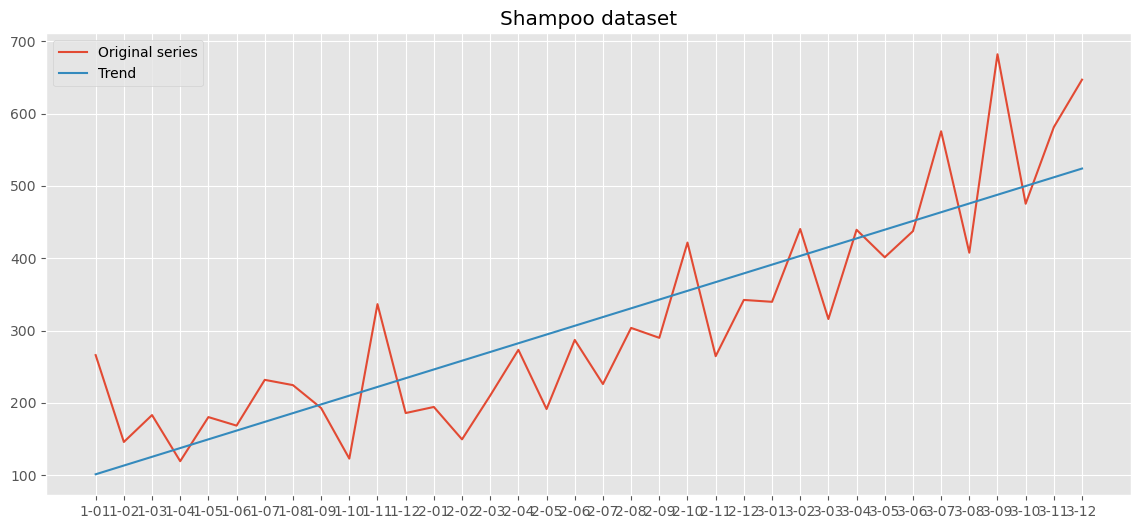

In [16]:
# Compute trend
trend = model.predict(x)
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(series.index, series.values, label="Original series")
ax.plot(series.index, trend, label="Trend")
ax.legend()
ax.set_title("Shampoo dataset")
plt.show();

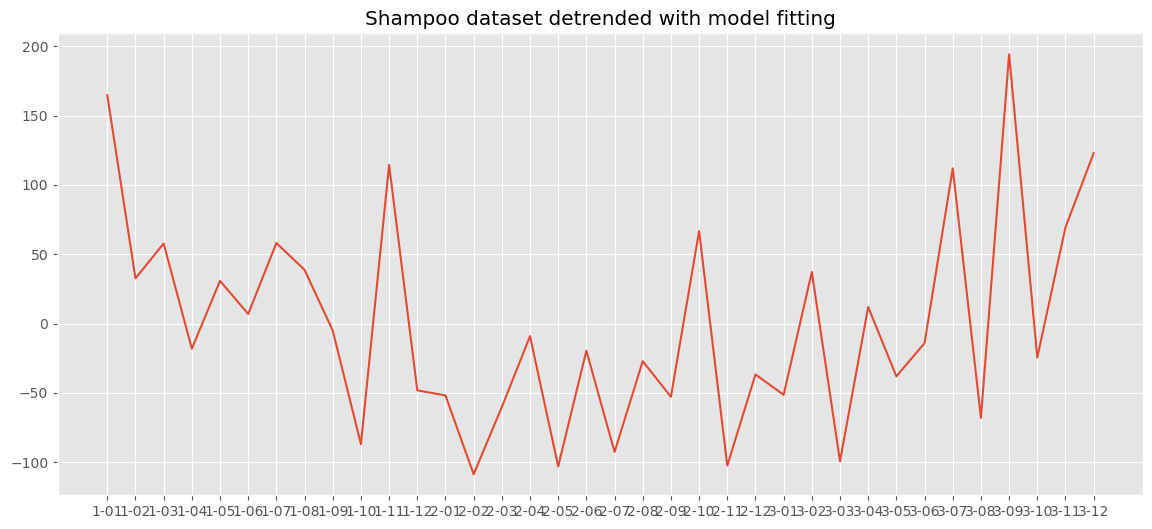

In [17]:
# Detrend
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(series.index, series.values - trend)
ax.set_title("Shampoo dataset detrended with model fitting")
plt.show();

# Autocorrelation Plots
We can quantify the strength and type of relationship between observations and their lags. In
statistics, this is called **correlation**, and when calculated against lag values in time series, it is
called autocorrelation (self-correlation). 

A correlation value calculated between two groups of
numbers, such as observations and their lag=1 values, results in a number between **-1** and **1**.

The sign of this number indicates a negative or positive correlation respectively. 

A value close to **zero** suggests a **weak correlation**, whereas a value **closer to -1 or 1 indicates a strong correlation**.

Correlation values, called correlation coeffcients, can be calculated for each observation and
dfferent lag values. Once calculated, a plot can be created to help better understand how this
relationship changes over the lag.

## Interpreting the autocorrelation plot
The resulting plot shows lag along the x-axis and the correlation on the y-axis. 

**Dotted lines are provided that indicate any correlation values above those lines are statistically significant
(meaningful). **

We can see that for the Minimum Daily Temperatures dataset we see cycles of
strong negative and positive correlation. 

This captures the relationship of an observation with

**Sine waves like those seenin this example are a strong sign of seasonality in the dataset.**

For a stationary time series, the values of ACF or ρk are close to zero and hover around 0 at different lags. In the case of a non-stationary time series, the values of ACF tend to be high and move closer to +1 or -1.

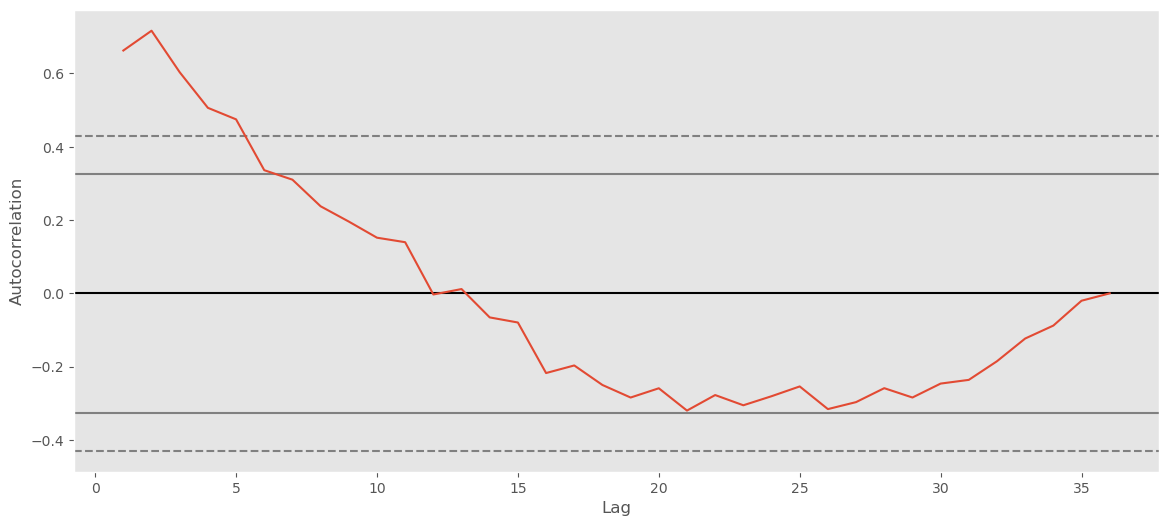

In [18]:
fig, ax = plt.subplots(figsize=(14, 6))
autocorrelation_plot(series, ax=ax)
plt.show();

## Autocorrelation (alternative Python function)

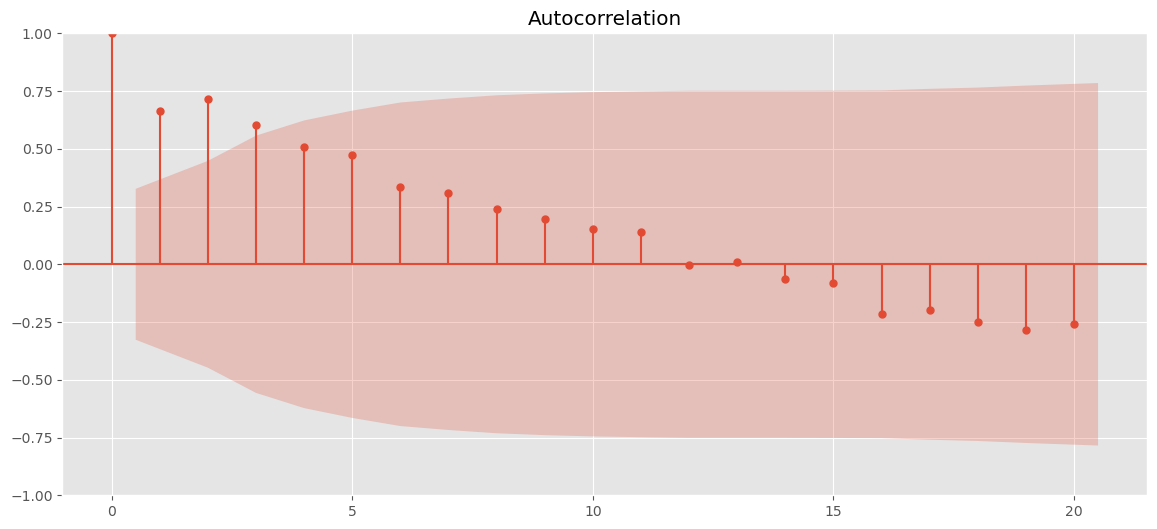

In [19]:
fig, ax = plt.subplots(figsize=(14, 6))
# Note: Limiting Lags to 20
plot_acf(series, lags=20, ax=ax)
# Show the AR as a plot
plt.show();

# Autocorrelation for residual errors in forecasting
Autocorrelation calculates the strength of the relationship between an observation and observa-
tions at prior time steps. 

We can calculate the autocorrelation of the residual error time series
and plot the results. 

This is called an autocorrelation plot. 

We would not expect there to be any correlation between the residuals. 

This would be shown by autocorrelation scores being below the threshold of significance (dashed and dotted horizontal lines on the plot).

A significant autocorrelation in the residual plot suggests that the model could be doing a better job of incorporating the relationship between observations and lagged observations, called autoregression. Pandas provides a built-in function for calculating an autocorrelation plot, called autocorrelation plot().

Below is an example of visualizing the autocorrelation for the residual errors. The x-axis shows the lag and the y-axis shows the correlation between an observation and the lag variable, where correlation values are between -1 and 1 for negative and positive correlations respectively.

## Transform series into dataframe for modeling

In [20]:
series = pd.read_csv('datasets/daily-total-female-births.csv',
                     header=0, index_col=0, parse_dates=True).squeeze()

X = pd.DataFrame({
    "t" : series.shift(1).values,
    "t+1": series.values
}, index=series.index)
print(X.head())

               t  t+1
Date                 
1959-01-01   NaN   35
1959-01-02  35.0   32
1959-01-03  32.0   30
1959-01-04  30.0   31
1959-01-05  31.0   44


## Split data in train and test

In [21]:
train_size = int(len(X) * 0.66)
train, test = X[1: train_size], X[train_size:]
X_train, y_train = train.iloc[:, 0], train.iloc[:, 1]
X_test, y_test = test.iloc[:, 0], test.iloc[:, 1]

## Persistence Forecast Model
The simplest forecast that we can make is to forecast that **what happened in the previous time
step will be the same as what will happen in the next time step**. 

This is called the **naive forecast** or the **persistence forecast model**. We can implement the persistence model in Python.
After the dataset is loaded, it is phrased as a supervised learning problem. 

**A lagged version of the dataset is created where the prior time step (t) is used as the input variable and the next
time step (t+1) is taken as the output variable.**

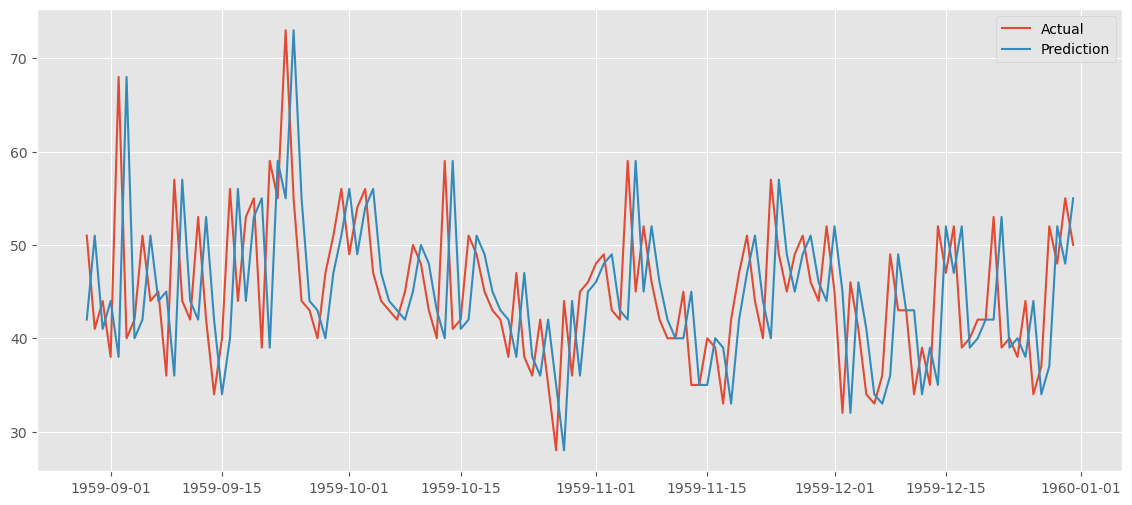

In [22]:
predictions = pd.Series([x for x in X_test], index=y_test.index)

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(y_test, label="Actual")
ax.plot(predictions, label="Prediction")
ax.legend()
plt.show()

## Residual errors analysis
Running the example shows a mean error value close to zero, but perhaps **not close enough**.

It suggests that there may be some bias and that we may be able to further improve the model
by performing a bias correction. This could be done by adding the mean residual error (0.064000)
to forecasts. 

This may work in this case, but it is a naive form of bias correction and there are
more sophisticated methods available.


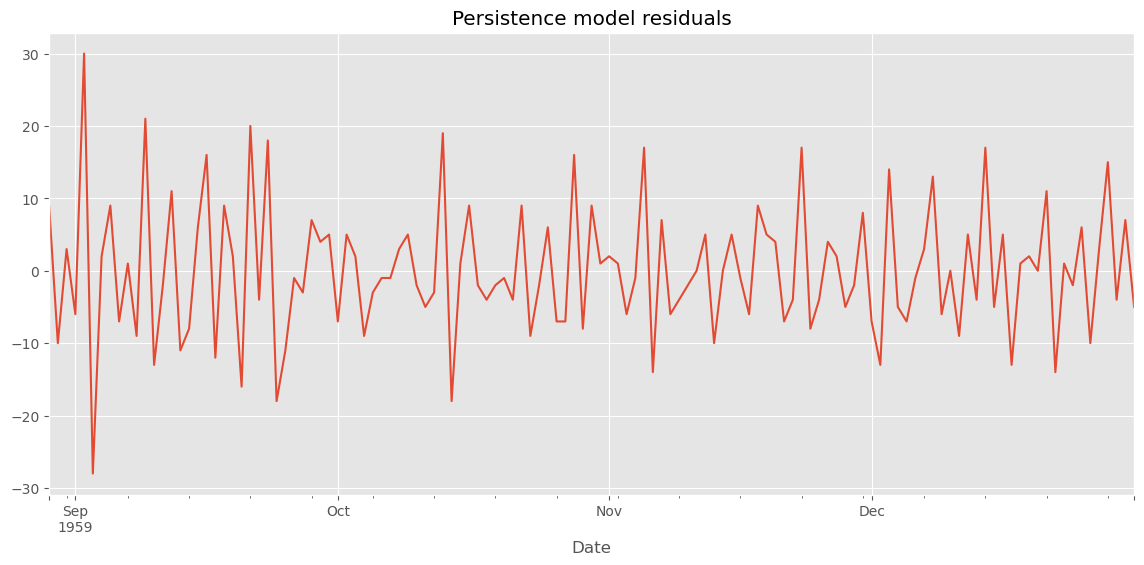

count    125.000000
mean       0.064000
std        9.187776
min      -28.000000
25%       -6.000000
50%       -1.000000
75%        5.000000
max       30.000000
Name: residuals, dtype: float64


In [23]:
residuals = pd.Series(y_test - predictions, name="residuals")

residuals.plot(figsize=(14, 6), title="Persistence model residuals")
plt.show();

print(residuals.describe())

## Residual errors histogram
We can see that the distribution does have a Gaussian look, but is perhaps more pointy,
showing an exponential distribution with some asymmetry. 

If the plot showed a distribution that was distinctly non-Gaussian, it would suggest that assumptions made by the modeling
process were perhaps incorrect and that a different modeling method may be required. 

A large skew may suggest the opportunity for performing a transform to the data prior to modeling, such as taking the log or square root.


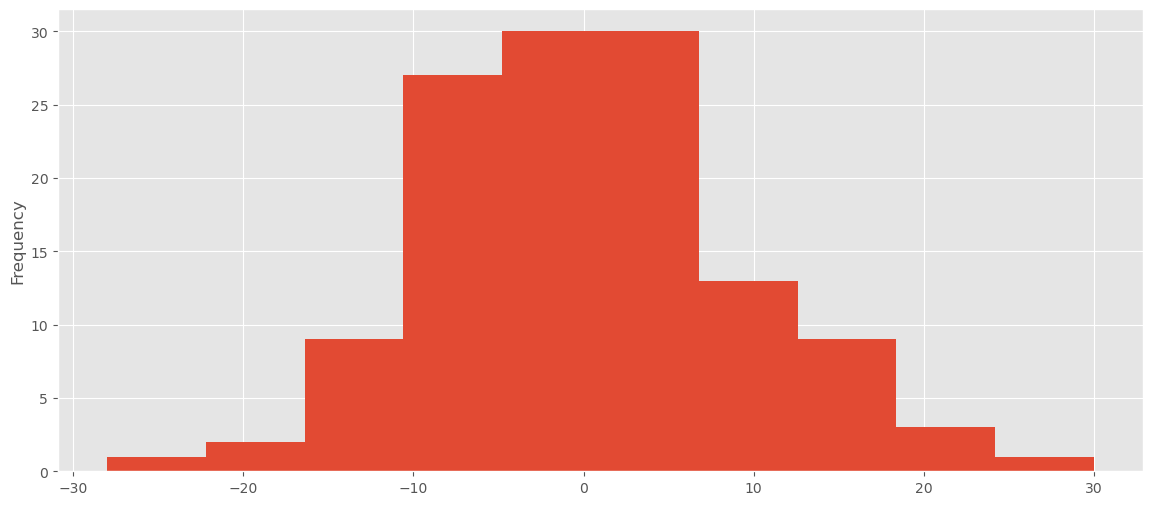

In [24]:
# Histogram plot
residuals.plot(kind="hist", figsize=(14, 6))
plt.show();

## ACF residuals errors analysis
Running the example creates an autoregression plot of other residual errors. 

We do not see an obvious autocorrelation trend across the plot. 

There may be some positive autocorrelation worthy of further investigation at lag 7 that seems significant.


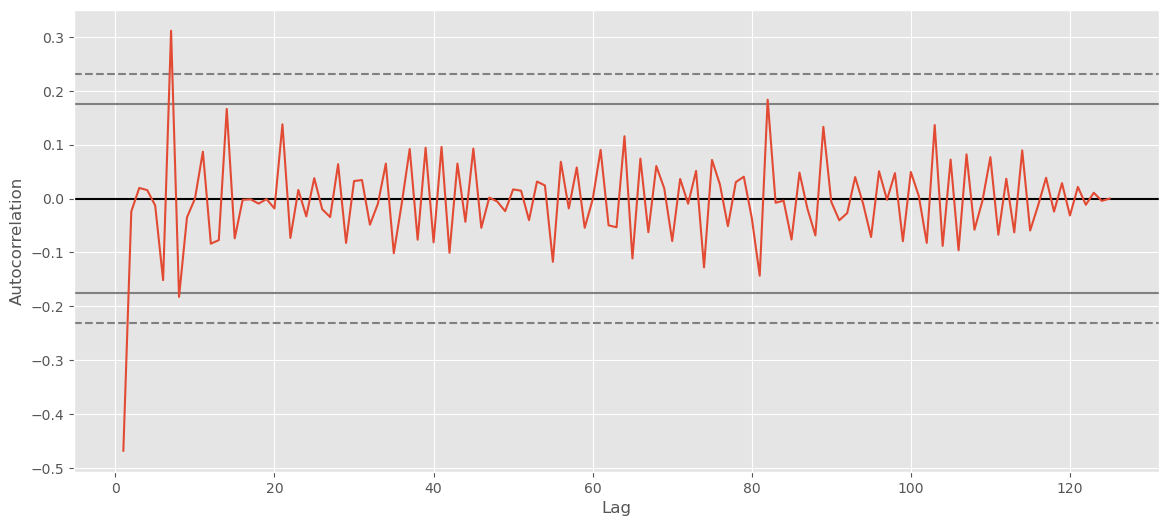

In [25]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.grid()

autocorrelation_plot(residuals, ax=ax)
plt.show()